# Reinforcment Learning Homework

## Section A - Notebook Setup [5 pts]

To help prepare you for the class project, we are going to ask you to set up your notebook slightly differently this time: Rather than installing explorationlib from one of its existing git repositories (such as `parenthetical-e` or `clappm`), install it from a git repository that you own.  Fork the code!

In [1]:
!pip install --upgrade git+https://github.com/jamil-wittmann/explorationlib
!pip install --upgrade git+https://github.com/jamil-wittmann/gym-maze


  Cloning https://github.com/jamil-wittmann/explorationlib to /tmp/pip-req-build-gpt18i0t
  Running command git clone -q https://github.com/jamil-wittmann/explorationlib /tmp/pip-req-build-gpt18i0t
  Created wheel for explorationlib: filename=explorationlib-0.0.1-py3-none-any.whl size=24681 sha256=78d6305c723cec2a824b4d91c82c0c45fd9cfe40ac33092aab25416ebaa3d5eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-d_y__gea/wheels/d3/09/5c/139572b58f455a09efe131a441e67100f3072b332bdf3fa2b5
Successfully built explorationlib
  Cloning https://github.com/jamil-wittmann/gym-maze to /tmp/pip-req-build-wpa4hftz
  Running command git clone -q https://github.com/jamil-wittmann/gym-maze /tmp/pip-req-build-wpa4hftz
     |████████████████████████████████| 18.3 MB 19 kB/s 
  Created wheel for gym-maze: filename=gym_maze-0.4-py3-none-any.whl size=14241 sha256=a06fe3fee63fae953b7c9ff83a1b978a2b93a416e960fe6e7cf0d310586fa328
  Stored in directory: /tmp/pip-ephem-wheel-cache-eiiact72/wheels/ba/ea/35/312586

## Section B - Understanding the code structure [5 pts]

*pop quiz!*

In the lab, we went over the python classes for `RandomActor`, `SequentialActor`, and `EpsilonActor`.  We did not however show the code for `BoundedRandomActor` or `BoundedSequentialActor`.  Please post the class definitions for those agents below, so that we know that you know where to find them.

In [2]:
# BoundedRandomActor
class BoundedRandomActor(BanditAgent):
    def __init__(self, num_actions, bound=100):
        super().__init__()
        self.num_actions = num_actions
        self.bound = int(bound)
        self.actions = list(range(self.num_actions))

    def __call__(self, values):
        return self.forward(values)

    def forward(self, values):
        """Values are a dummy var. Pick at random"""
        self.action_count += 1
        if self.action_count < self.bound:
            action = self.np_random.choice(self.actions)
        else:
            action = np.argmax(values)

        return action

    def reset(self):
        self.action_count = 0

NameError: ignored

In [ ]:
# BoundedSequentialActor
class BoundedSequentialActor(BanditAgent):
    """Choose actions in sequence; ignore value"""
    def __init__(self, num_actions, bound=100, initial_action=0):
        super().__init__()

        self.num_actions = int(num_actions)
        self.initial_action = int(initial_action)
        self.action_count = self.initial_action
        self.bound = int(bound)

    def __call__(self, values):
        return self.forward(values)

    def forward(self, values):
        self.action_count += 1

        if self.action_count < self.bound:
            action = self.action_count % self.num_actions
        else:
            action = np.argmax(values)

        return action

    def reset(self):
        self.action_count = self.initial_action

## Section C - Understanding Entropy

### Question [10 pts]

As discussed in lab, both the Random and Sequential explorers produce max-entropy behavior asymptotically.  If we ran 100 bandit experiments (similar to those in Section 1.3 of Lab), how often do you expect the measured entropy of the Random agent to *exceed* the entropy of the Sequential agent?  Please justify your answer.



```
# This is formatted as code
```

From my understanding, both actors don't explore with value, they are both max entropy action systems. The Random agent chooses randomly, while the Sequential agent will choose in a controlled way that maximizes entropy thus leading to increased average entropy over a trial like this (100 bandit experiments). And although the Random explorer may exeed the entropy of the Sequential explorer in some trials, it intuitively makes sense that on average the Sequential explorer will exede the entropy of the Random explorer because it's never the case that the Sequential will not choose the optimal arm while being possible for the Random agent. 




### Question [5 pts]

If you had to pick one (either Random or Sequential) as your personal bandit exploration strategy, which would you choose and why?



```
# This is formatted as code
```

For many of the same reasons used above, I would rather use a Sequential exploration strategy. It seems like a safer bet on average since I'm more likely to choose the optimal arm or close to the optimal arm multiple times compared to just rolling the dice and running into the chance of never choosing the optimal arm. 

### Running sims of the $\epsilon$-greedy agent [5 pts]

Consider the $\epsilon$-greedy agent we explored in Section 1.4 of lab.  There, we only looked at three values for epsilon (0.05, 0.5, 0.95). Pick at least 3 more episilon values, add them to that list, and rerun the 40 experiments of 400 steps each.

In [3]:
# import basic modules
import shutil
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import explorationlib
import explorationlib

# import the type of environment we will be using
from explorationlib.local_gym import BanditUniform4

# import the components to build our agents
from explorationlib.agent import BanditActorCritic
from explorationlib.agent import Critic
from explorationlib.agent import EpsilonActor
from explorationlib.agent import RandomActor
from explorationlib.agent import SequentialActor
from explorationlib.agent import BoundedRandomActor
from explorationlib.agent import BoundedSequentialActor

# import the experimental framework
from explorationlib.run import experiment

# import some scoring functions
from explorationlib.score import total_reward
from explorationlib.score import action_entropy

# import some utility functions
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# import some plotting functions
from explorationlib.plot import plot_bandit
from explorationlib.plot import plot_bandit_actions
from explorationlib.plot import plot_bandit_critic
from explorationlib.plot import plot_bandit_hist

# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Dev
%load_ext autoreload
%autoreload 2

# Shared env params
seed = 503

# Create env
env = BanditUniform4(p_min=0.1, p_max=0.3, p_best=0.35)
env.seed(seed)


pygame 2.1.0 (SDL 2.0.16, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


[503]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_1:   0%|          | 0/100 [00:00<?, ?it/s]

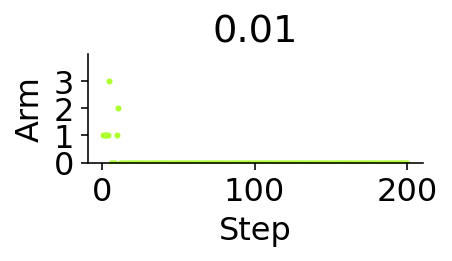

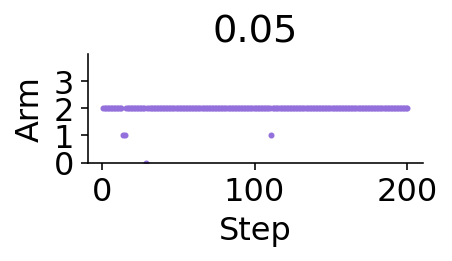

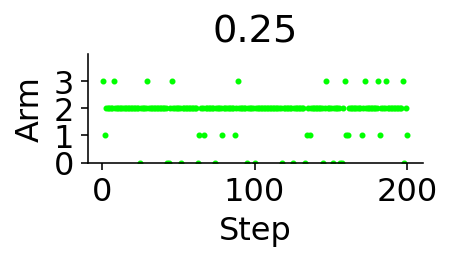

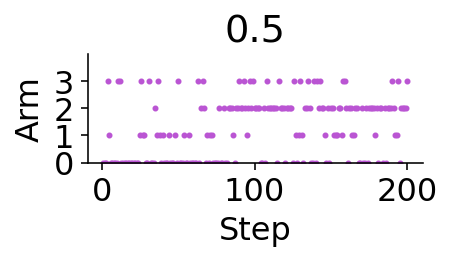

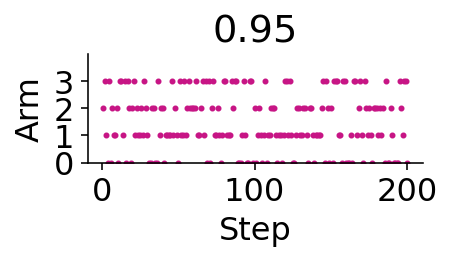

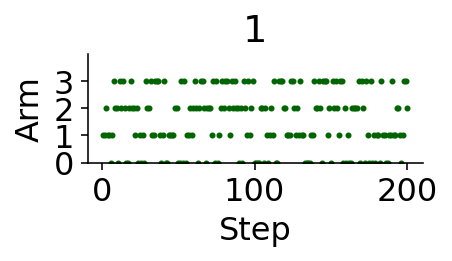

In [6]:
num_steps = 4 * 100
epsilons = [0.01, 0.05, 0.25, 0.5, 0.95, 1]

names = [str(epsilon) for epsilon in epsilons]
colors = ["greenyellow", "mediumpurple", "lime", "mediumorchid", "mediumvioletred", "darkgreen"]

# !
results = []
for i, (name, epsilon) in enumerate(zip(names, epsilons)):
    agent = BanditActorCritic(
        EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
        Critic(num_inputs=env.num_arms, default_value=0.0)
    )
    log = experiment(
        f"ep_{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=100,
        dump=False,
        split_state=False,
    )
    results.append(log)

num_experiment = 40
for name, res, color in zip(names, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment), 
        max_steps=200,
        s=4,
        title=name, 
        color=color,
        figsize=(3, 1)
        )
    

### Plotting the results [10 pts]

Plot the mean rewards and the mean entropy values for the agents.  (The two bar charts in Section 1.4).

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

action_entropy:   0%|          | 0/100 [00:00<?, ?it/s]

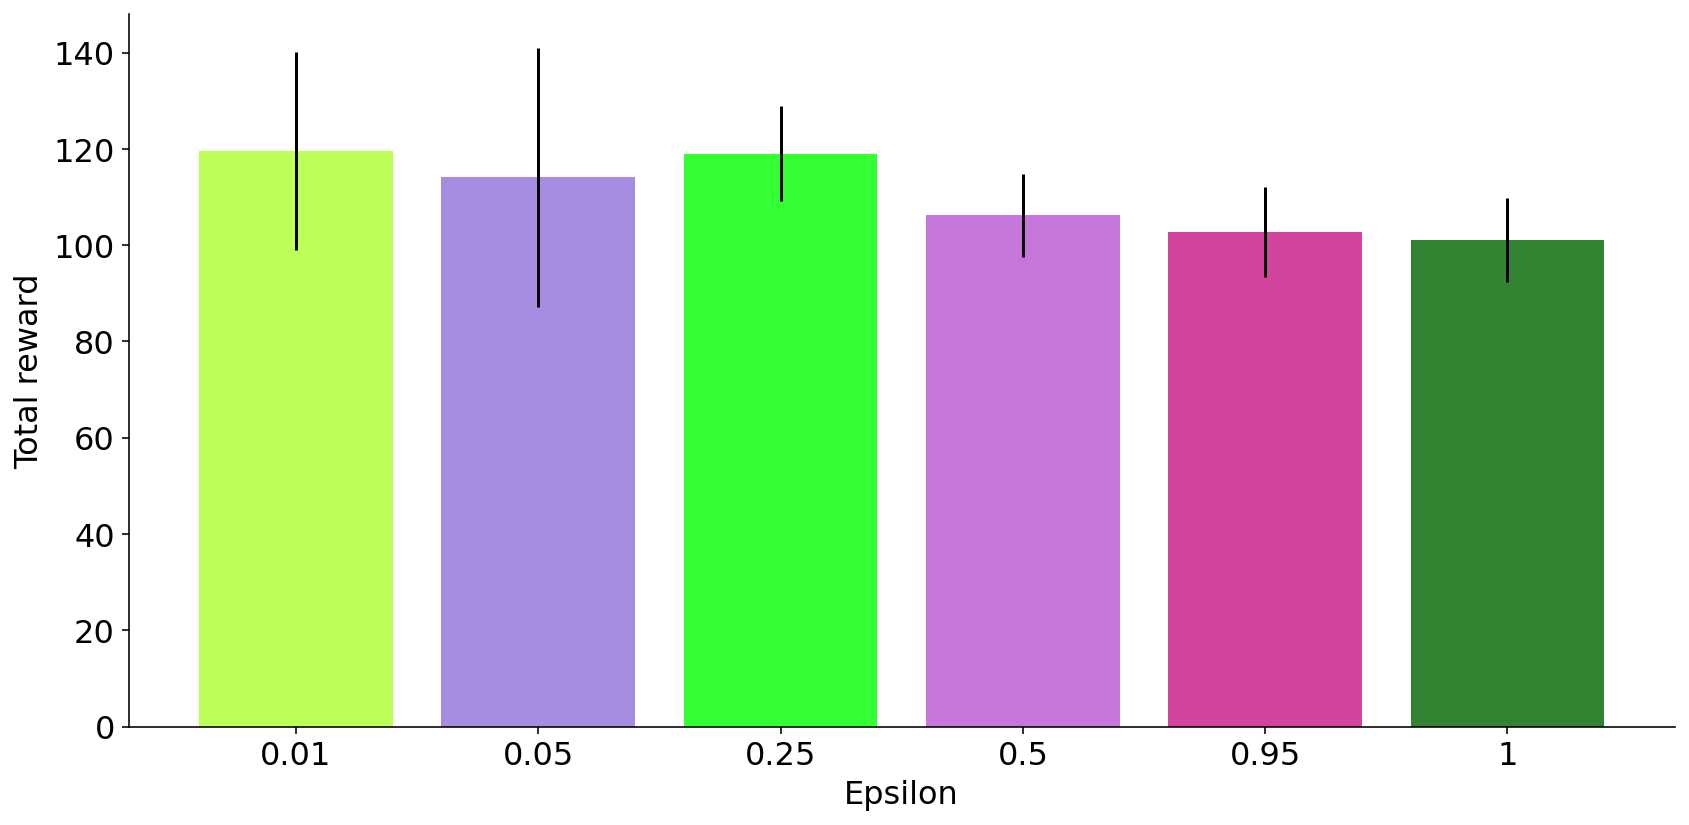

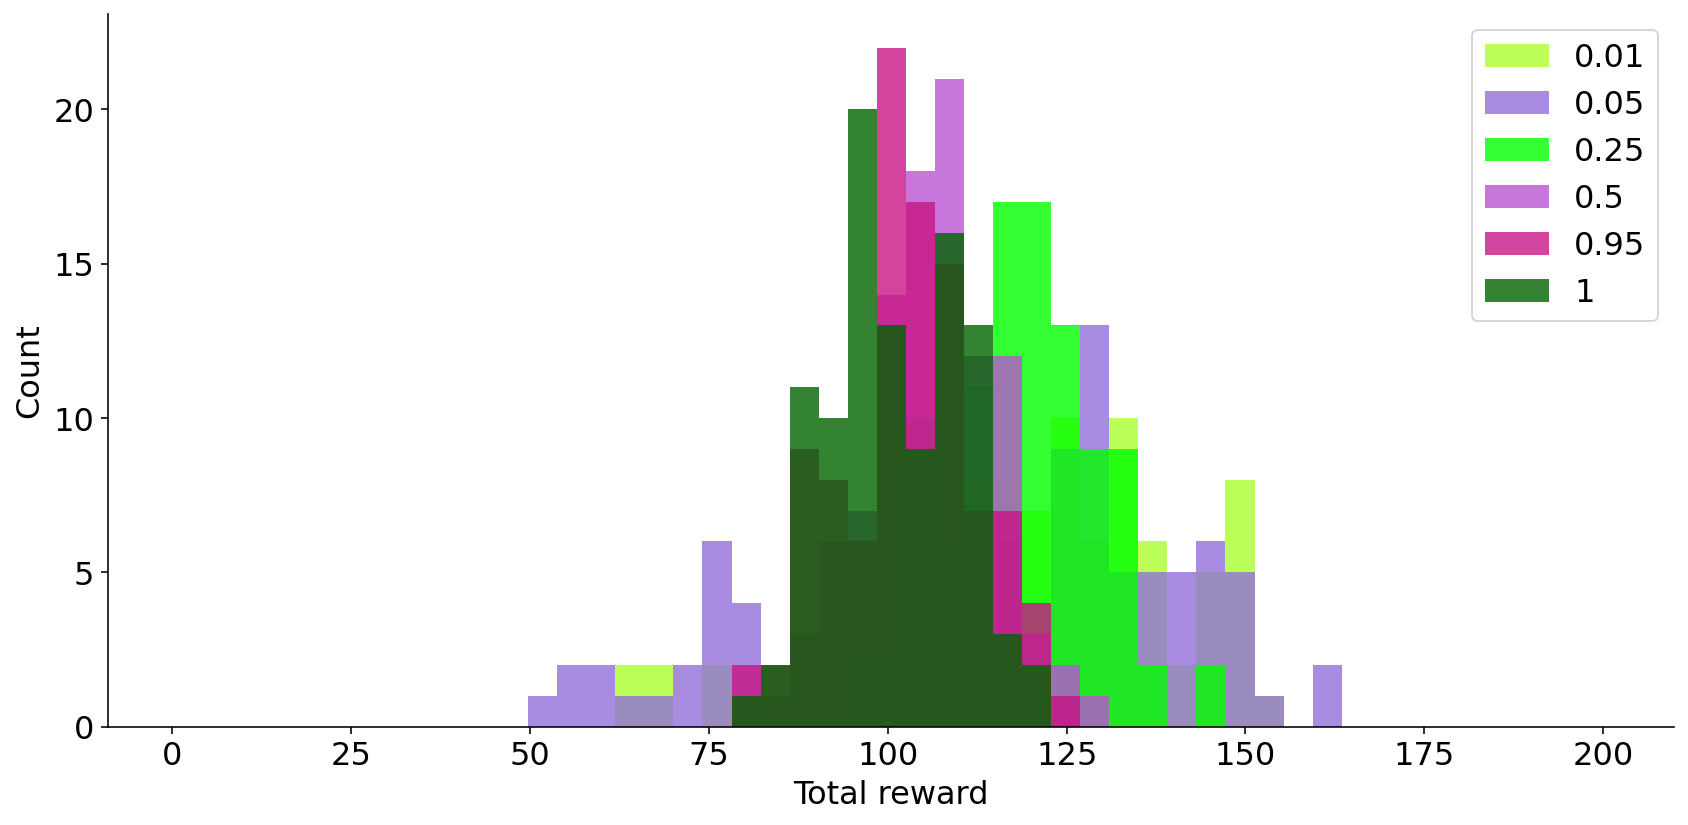

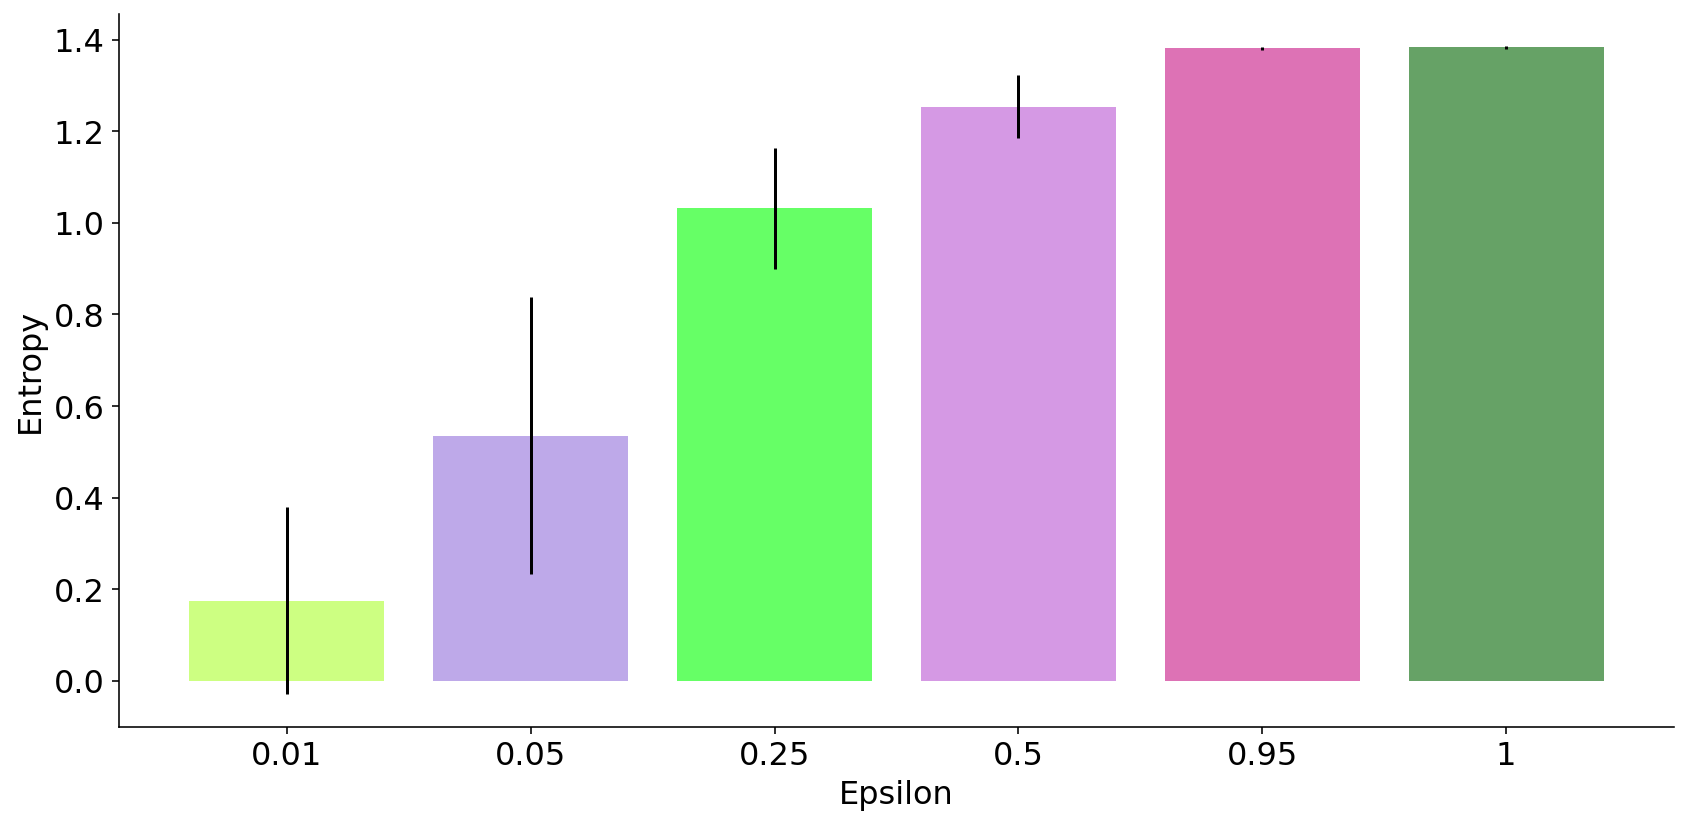

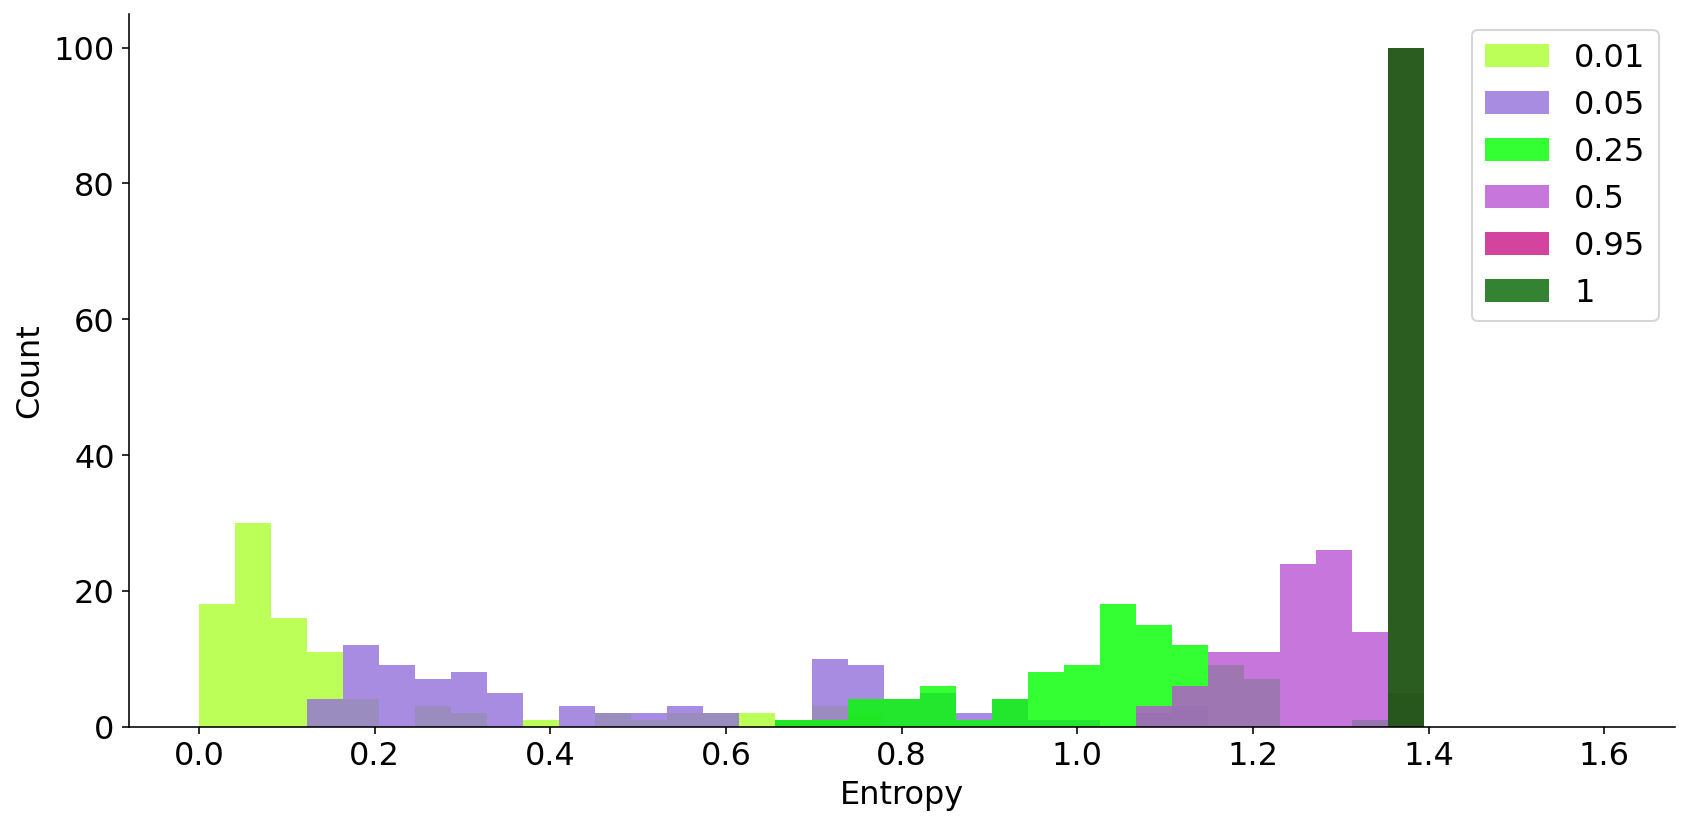

In [8]:
# your code cells here
# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(12, 6))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Epsilon")
plt.tight_layout()
sns.despine()


fig = plt.figure(figsize=(12, 6))
for (name, s, c) in zip(names, scores, colors):
    plt.hist(s, label=name, color=c, alpha=0.8, bins=np.linspace(1, 200, 50))
    plt.legend()
    plt.xlabel("Total reward")
    plt.ylabel("Count")
    plt.tight_layout()
    sns.despine()

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = action_entropy(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(12, 6))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Entropy")
plt.xlabel("Epsilon")
plt.tight_layout()
sns.despine()

fig = plt.figure(figsize=(12, 6))
for (name, s, c) in zip(names, scores, colors):
    plt.hist(s, label=name, color=c, alpha=0.8, bins=np.linspace(0, 1.6, 40))
    plt.legend()
    plt.xlabel("Entropy")
    plt.ylabel("Count")
    plt.tight_layout()
    sns.despine()

### Question [5 pts] 

In your own words, explain how $\epsilon$ seems to relate to _total reward_ and _action entropy_. As $\epsilon$ grows, what happens?

As 𝜖 grows, total reward decreases, while action entropy increases. Total reward and action entropy share an inverse relationship with regards to 𝜖.

### Question [5 pts]

Let's ask this again from another direction. When looking at the performance of the $\epsilon$-greedy agents, what relationship do you see between _total reward_ and _action entropy_?  To answer, focus on the the bar plots of entropy and reward.

Can you explain this correlation in terms of the explore-exploit dilemma?

Piggy backing off my previous answer, total reward and action entropy share an inverse relationship with regards to 𝜖. So, as 𝜖 moves in one direction, total reward will increase while action entropy decreases & vice versa. Tying this to  explore-exploit, if 𝜖 is large, exploring is more likely to happen/be greater which results in more action entropy (more explore means more entropy since we're searching for the optimal arm) and thus less reward. Convsersely, if 𝜖 is smaller then we'll have less entropy since reward is greater; we are exploiting an "optimal arm" so we are maximizing reward and minimizing entropy since we don't need to move/search for another arm.



### Question [5 pts]

Does there seem to be any relationship between epsilon and the *standard deviation* of rewards (the error bars on the bar chart)?  Why might we expect such a relationship to exist? 

Yes. 

I'm unfimiliar with the exact terminology to use here, but I'll describe the length of the lines regarding the standard deviation as a "spread". So, the spread of the standard deviation appears larger as epsilon is smaller and as epsilon grows, this spread tightens/decreases. 

If I think about it in an explore-exploit lense, if epsilon is decreasing then I'm more likely to be exploiting which means that I'm maximizing reward. We are starting to set on one specific arm instead of trying to explore all of them, this leaves us with either exploiting the most optimal one over and over or exploiting a sub-optimal one over and over resulting in a larger spread/SD. This line of reasoning would follow inversely if epsilon was increasing.

## Section D - Tuning epsilon [15 pts]

In the lab, we did not attempt to tune the value of epsilon.  Now, it is your turn to do so.

Try to estimate the optimal value of epsilon (for this very particular bandit task). We recognize that the results will be quite noisy, and that it will be essentially impossible to tell which precise value of $\epsilon$ is truly the best. Give it a good shot but don't overanalyze it.

The coding is up to you, but we ask that you clearly show your tuning process: Put each batch of simulations you run into a separate code cell, so that we can see all of the plots you make. This way, you are showing us your work.

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

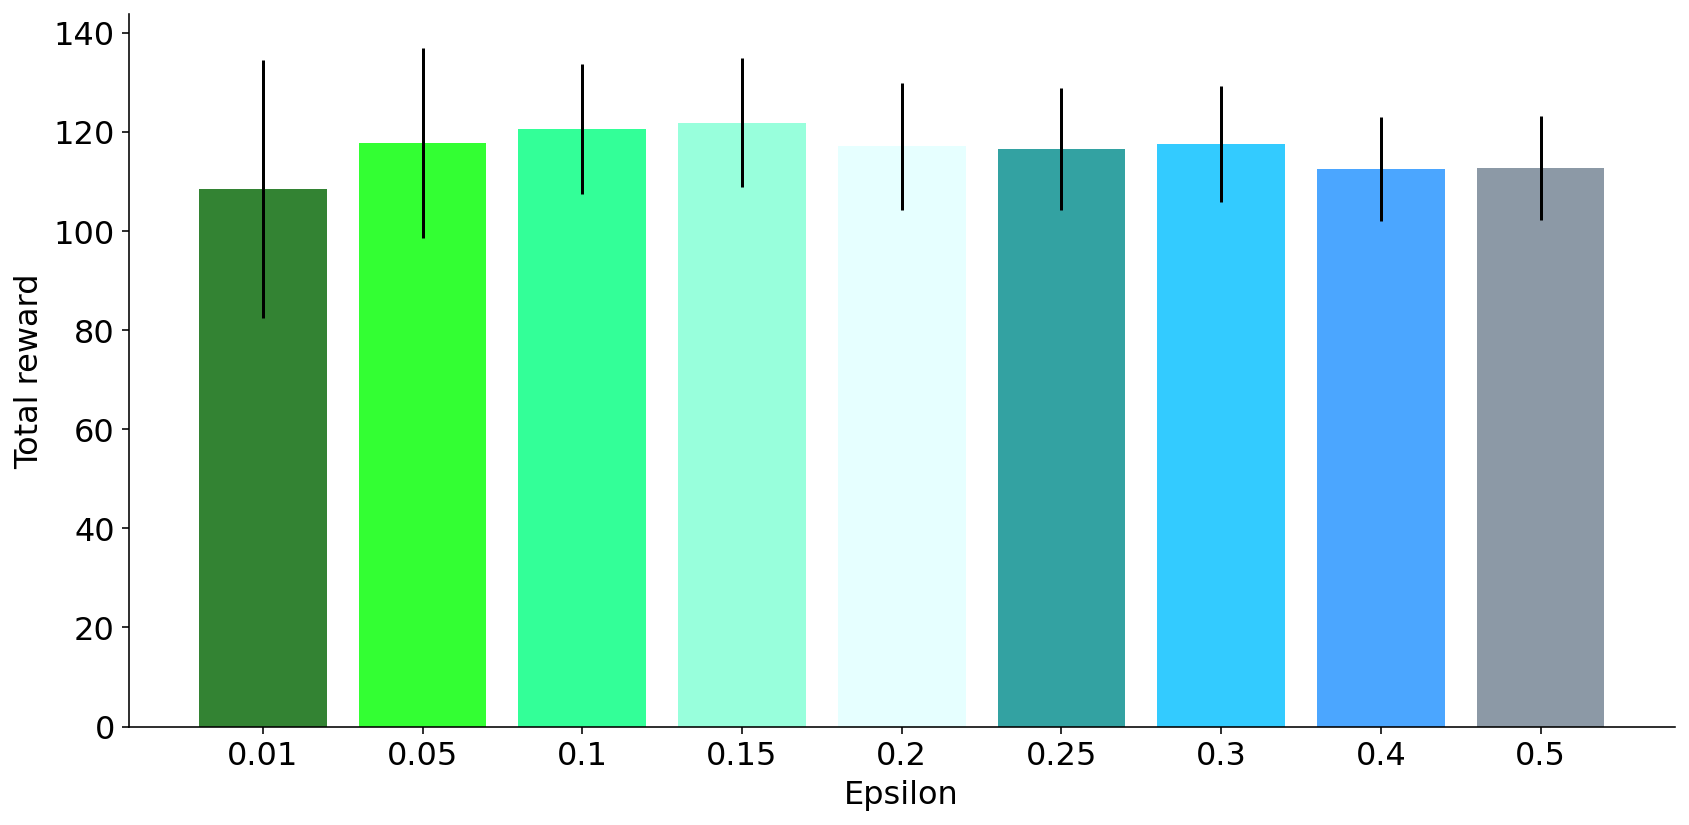

In [10]:
num_steps = 4 * 100
epsilons = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

names = [str(epsilon) for epsilon in epsilons]
colors = ["darkgreen", "lime", "springgreen", "aquamarine", "lightcyan", "darkcyan", "deepskyblue", "dodgerblue", "slategrey"]


# !
results = []
for i, (name, epsilon) in enumerate(zip(names, epsilons)):
    agent = BanditActorCritic(
        EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
        Critic(num_inputs=env.num_arms, default_value=0.0)
    )
    log = experiment(
        f"ep_{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=100,
        dump=False,
        split_state=False,
    )
    results.append(log)


# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(12, 6))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Epsilon")
plt.tight_layout()
sns.despine()

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_1:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

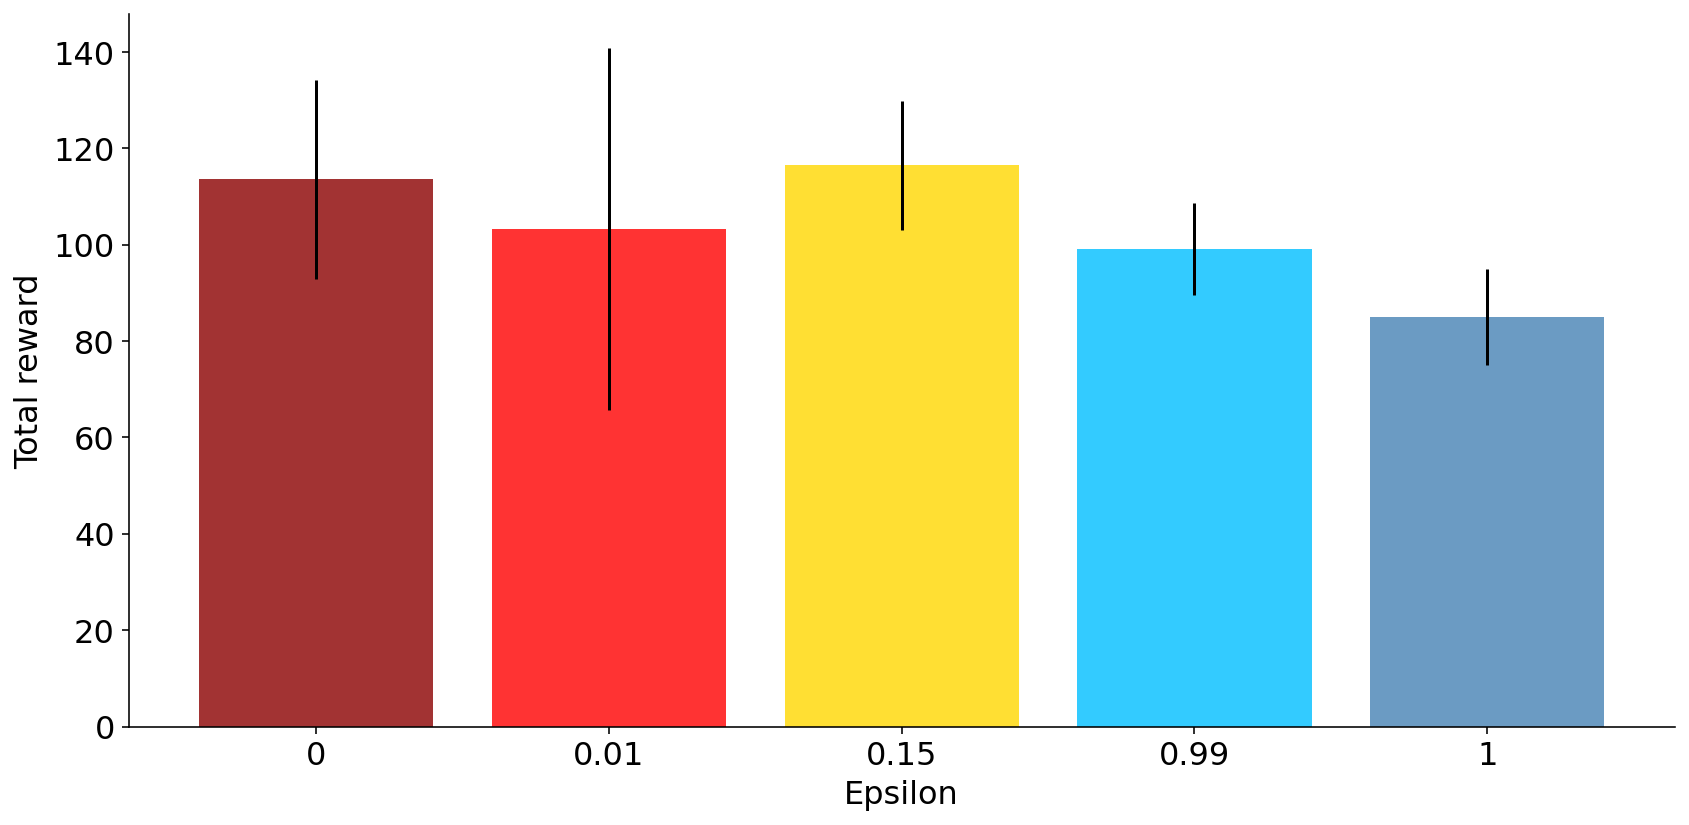

In [11]:

num_steps = 4 * 100
epsilons = [0, 0.01, 0.15, 0.99, 1]

names = [str(epsilon) for epsilon in epsilons]
colors = ["darkred", "red", "gold", "deepskyblue", "steelblue"]

# !
results = []
for i, (name, epsilon) in enumerate(zip(names, epsilons)):
    agent = BanditActorCritic(
        EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
        Critic(num_inputs=env.num_arms, default_value=0.0)
    )
    log = experiment(
        f"ep_{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=100,
        dump=False,
        split_state=False,
    )
    results.append(log)


# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(12, 6))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Epsilon")
plt.tight_layout()
sns.despine()



ep_0:   0%|          | 0/1000 [00:00<?, ?it/s]

ep_0:   0%|          | 0/1000 [00:00<?, ?it/s]

ep_0:   0%|          | 0/1000 [00:00<?, ?it/s]

ep_0:   0%|          | 0/1000 [00:00<?, ?it/s]

ep_0:   0%|          | 0/1000 [00:00<?, ?it/s]

ep_0:   0%|          | 0/1000 [00:00<?, ?it/s]

ep_0:   0%|          | 0/1000 [00:00<?, ?it/s]

total_reward:   0%|          | 0/1000 [00:00<?, ?it/s]

total_reward:   0%|          | 0/1000 [00:00<?, ?it/s]

total_reward:   0%|          | 0/1000 [00:00<?, ?it/s]

total_reward:   0%|          | 0/1000 [00:00<?, ?it/s]

total_reward:   0%|          | 0/1000 [00:00<?, ?it/s]

total_reward:   0%|          | 0/1000 [00:00<?, ?it/s]

total_reward:   0%|          | 0/1000 [00:00<?, ?it/s]

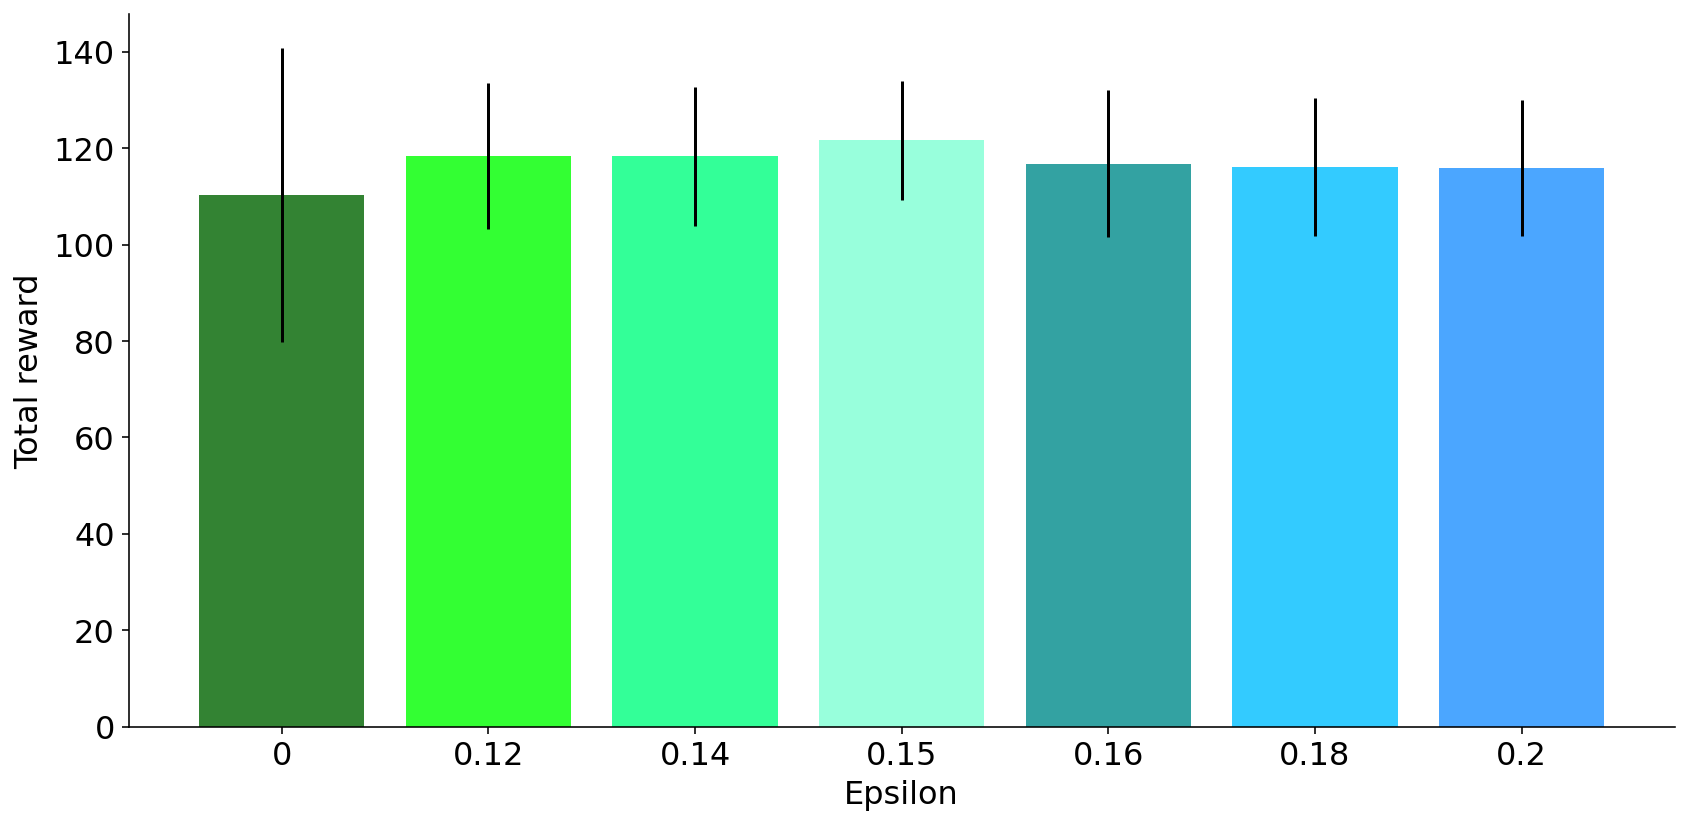

In [12]:
num_steps = 4 * 100
epsilons = [0, 0.12, 0.14, 0.15, 0.16, 0.18, 0.2]

names = [str(epsilon) for epsilon in epsilons]
colors = ["darkgreen", "lime", "springgreen", "aquamarine", "darkcyan", "deepskyblue", "dodgerblue"]

# !
results = []
for i, (name, epsilon) in enumerate(zip(names, epsilons)):
    agent = BanditActorCritic(
        EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
        Critic(num_inputs=env.num_arms, default_value=0.0)
    )
    log = experiment(
        f"ep_{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=1000,
        dump=False,
        split_state=False,
    )
    results.append(log)


# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(12, 6))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Epsilon")
plt.tight_layout()
sns.despine()


Here I'm tuning epsilon in hopes to maximize reward. I started with lower epsilon values based on findings in the previos section (lower epsilon -> more reward). From there, reward seems to be maximized around the 0.15 epsilon level. I then isolated this this range around the 0.15 level and ran 1000 expirements with the values [0, 0.12, 0.14, 0.15, 0.16, 0.18, 0.2]. I found that 0.15 seems to be with best fit as it possess the highest average rewards with similar or smaller spreads in the standard distribution. 

## Section E - Comparing the tuned agents

### Coding [10 pts]

Rerun the code from Section 2.3 of the lab, to compare the tuned $\epsilon$-greedy agent to the tuned bounded random and bounded sequential agents. Now, since we have tuned all three agents, the playing field is a bit more level.

Plot the average rewards of the three agents.

In [15]:
bound = 75  # use 75 as the "tuned" bound
epsilon = 0.15

b-ran:   0%|          | 0/250 [00:00<?, ?it/s]

b-seq:   0%|          | 0/250 [00:00<?, ?it/s]

ep-greedy:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

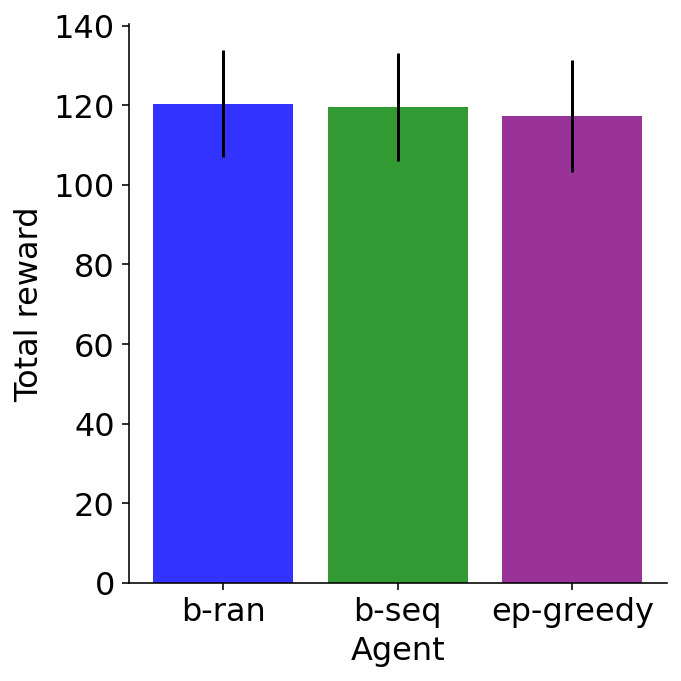

In [18]:


bounded_ran = BanditActorCritic(
    BoundedRandomActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
bounded_seq = BanditActorCritic(
    BoundedSequentialActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [bounded_ran, bounded_seq, epy]
names = ["b-ran", "b-seq", "ep-greedy"]
colors = ["blue", "green", "purple"]


num_steps = 400  # Three rounds per arm, about that anyway
num_experiments = 250

# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(5, 5))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

### Question [5 pts]

So, given these results, what's a better way to maximize total reward in this (reporting) task? Is it BoundedRandomActor? Or, BoundedSeqentialActor? Or is it _EpsilonActor_?



```
# This is formatted as code
```

Based on the results from the bar graph, BoundedRandomActor maximized total rewards the best with a very similar standard deviation spread relative to the other actors. With that being said, all three actors share similar average rewards, but BoundedRandomActor inches out on top. 

## Section F - Changing the number of steps

Throughout the tuning process, we have assumed that each bandit experiment lasted 400 steps. As a result, our agents are essentially designed to perform well for that particular setup.  In this section, we are going to ask you to run simulation batches with different values of `num_steps`, to see if the results of the previous section still hold true in a more general situation.

### Coding task: Re-running Section E with num_steps = 25, 100, and 1600 [10 pts]

Between section E and section F combined, you should end up with four total plots, showing the bar chart of mean rewards for step counts 25, 100, 400, and 1600.

b-ran:   0%|          | 0/250 [00:00<?, ?it/s]

b-seq:   0%|          | 0/250 [00:00<?, ?it/s]

ep-greedy:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

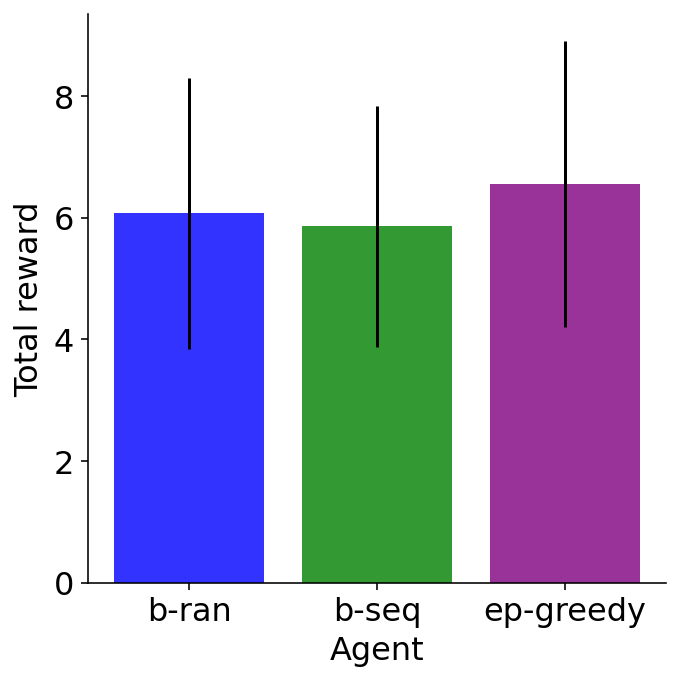

In [19]:
bounded_ran = BanditActorCritic(
    BoundedRandomActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
bounded_seq = BanditActorCritic(
    BoundedSequentialActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [bounded_ran, bounded_seq, epy]
names = ["b-ran", "b-seq", "ep-greedy"]
colors = ["blue", "green", "purple"]


num_steps = 25  # Three rounds per arm, about that anyway
num_experiments = 250

# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(5, 5))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

b-ran:   0%|          | 0/250 [00:00<?, ?it/s]

b-seq:   0%|          | 0/250 [00:00<?, ?it/s]

ep-greedy:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

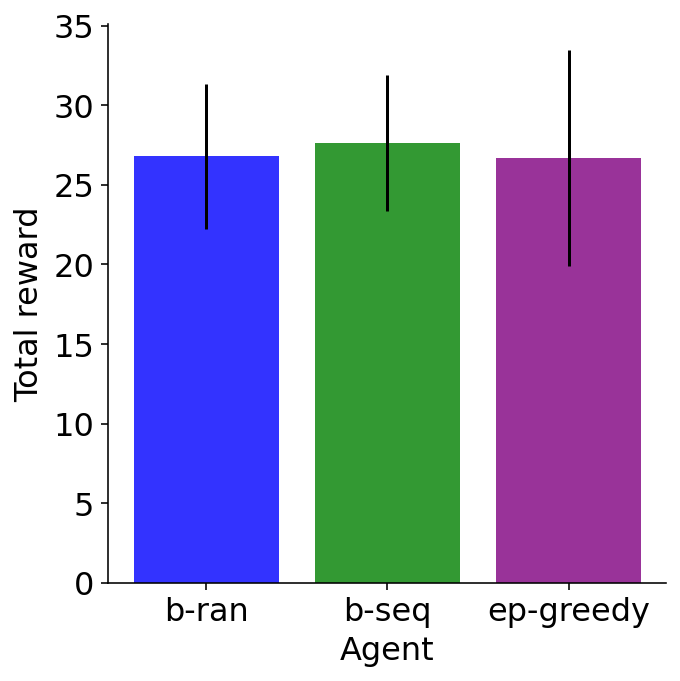

In [20]:
bounded_ran = BanditActorCritic(
    BoundedRandomActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
bounded_seq = BanditActorCritic(
    BoundedSequentialActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [bounded_ran, bounded_seq, epy]
names = ["b-ran", "b-seq", "ep-greedy"]
colors = ["blue", "green", "purple"]


num_steps = 100  # Three rounds per arm, about that anyway
num_experiments = 250

# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(5, 5))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

b-ran:   0%|          | 0/250 [00:00<?, ?it/s]

b-seq:   0%|          | 0/250 [00:00<?, ?it/s]

ep-greedy:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

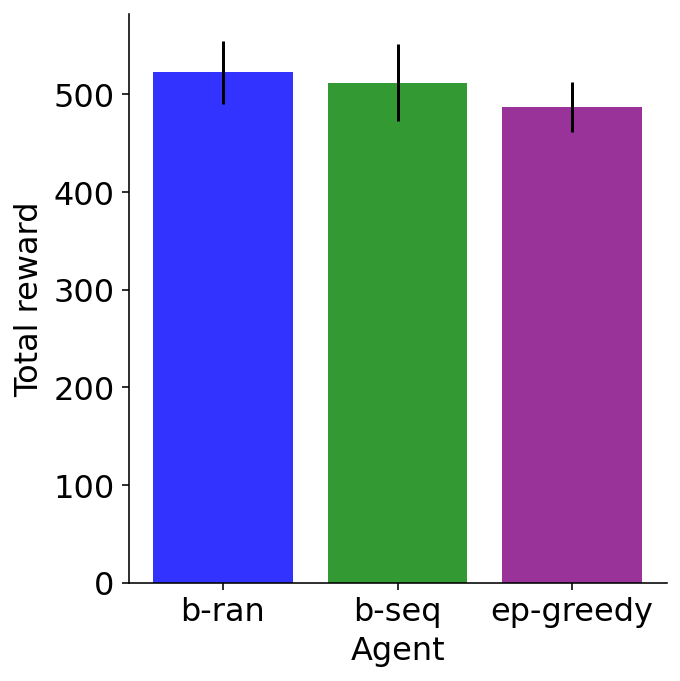

In [21]:
bounded_ran = BanditActorCritic(
    BoundedRandomActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
bounded_seq = BanditActorCritic(
    BoundedSequentialActor(num_actions=env.num_arms, bound=bound),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)
epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [bounded_ran, bounded_seq, epy]
names = ["b-ran", "b-seq", "ep-greedy"]
colors = ["blue", "green", "purple"]


num_steps = 1600  # Three rounds per arm, about that anyway
num_experiments = 250

# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(5, 5))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

### Question [5 pts]

Did the same agent always win? Or did different agents perform better at higher or lower step counts (compared to the baseline of 400 steps)?  Base your answer on your plots.

No, the same agent didn't always win. BoundedRandomActor won both 400 and 1,600, while BoundedSeqentialActor won 100 steps and EpsilonActor won 25 steps. 

It seems that BoundedRandomActor preforms better with larger step counts, however I can't establish a trend with the other two actors based on the information available.